In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [3]:
from emnist import extract_training_samples, extract_test_samples

In [4]:
import tensorflow_datasets as tfds

# Load EMNIST Balanced using tensorflow_datasets
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/bymerge',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Convert datasets to numpy arrays
train_images = []
train_labels = []
for image, label in tfds.as_numpy(ds_train):
    train_images.append(image)
    train_labels.append(label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = []
test_labels = []
for image, label in tfds.as_numpy(ds_test):
    test_images.append(image)
    test_labels.append(label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\bouit\tensorflow_datasets\emnist\bymerge\incomplete.K1KHLO_3.1.0\emnist-train.tfrecord*...:…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\bouit\tensorflow_datasets\emnist\bymerge\incomplete.K1KHLO_3.1.0\emnist-test.tfrecord*...: …

Dataset emnist downloaded and prepared to C:\Users\bouit\tensorflow_datasets\emnist\bymerge\3.1.0. Subsequent calls will reuse this data.


In [5]:
# Define the CNN model
num_classes = 47  # EMNIST Balanced has 47 classes

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

C:\Users\bouit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,927 (441.12 KB)

 Trainable params: 112,927 (441.12 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
epochs = 10
history = model.fit(
  train_images,
  train_labels,
  epochs=epochs,
  validation_data=(test_images, test_labels)
)

Epoch 1/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 350s 16ms/step - accuracy: 0.8344 - loss: 0.5114 - val_accuracy: 0.8935 - val_loss: 0.2965
Epoch 2/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 351s 16ms/step - accuracy: 0.8958 - loss: 0.2827 - val_accuracy: 0.8975 - val_loss: 0.2777
Epoch 3/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 359s 16ms/step - accuracy: 0.9013 - loss: 0.2653 - val_accuracy: 0.8987 - val_loss: 0.2746
Epoch 4/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 351s 16ms/step - accuracy: 0.9038 - loss: 0.2556 - val_accuracy: 0.8989 - val_loss: 0.2720
Epoch 5/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 353s 16ms/step - accuracy: 0.9049 - loss: 0.2516 - val_accuracy: 0.8996 - val_loss: 0.2735
Epoch 6/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 367s 17ms/step - accuracy: 0.9059 - loss: 0.2477 - val_accuracy: 0.8985 - val_loss: 0.2752
Epoch 7/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 355s 16ms/step - accuracy: 0.9072 - loss: 0.2445 - val_accuracy: 0.9004 - val_loss: 0.2719
Epoch 8/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 358s 16ms/s

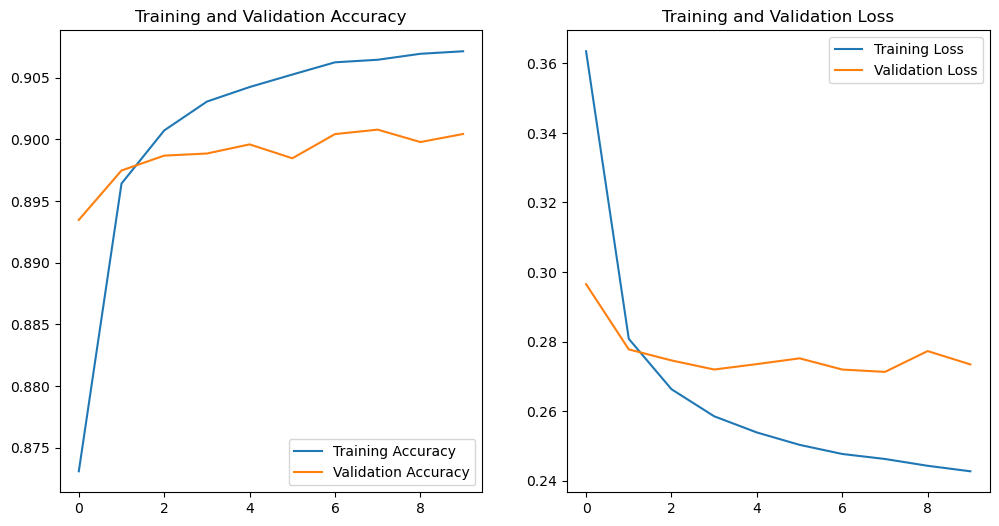

In [7]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Test images array shape: (4, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted character: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted character: H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted character: d
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted character: 3


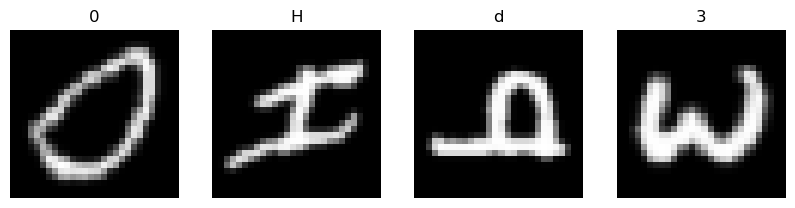

In [22]:
# Testing a few predictions
characters = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print("Test images array shape: {}".format(images.shape))

plt.figure(figsize=(10,5))
for i, test_image in enumerate(images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = np.argmax(model.predict(test_image), axis=-1)
    predicted_char = characters[prediction[0]]

    print("Predicted character: {}".format(predicted_char))
    plt.subplot(1, 4, i)
    plt.axis('off')
    plt.title(predicted_char)
    plt.imshow(org_image, cmap='gray')

plt.show()

In [9]:
# Save the model
model.save("tf_emnist_character_cnn_model.h5")
model.save("tf_emnist_character_cnn_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


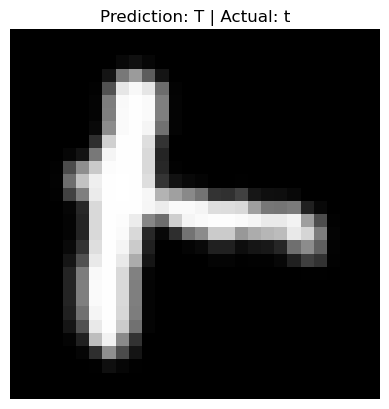

Random index: 687584
Prediction: T
Actual: t


In [69]:
import random

# Load the saved model
loaded_model = models.load_model("tf_emnist_character_cnn_model.h5")

# Pick a random index
random_index = random.randint(0, len(train_images) - 1)

# Get the random image and label
image = train_images[random_index].reshape(1, 28, 28, 1)
true_label = train_labels[random_index]

# Predict
model_pred = np.argmax(loaded_model.predict(image), axis=-1)
predicted_char = characters[model_pred[0]]
true_char = characters[true_label]

# Show the image and predictions
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Prediction: {predicted_char} | Actual: {true_char}")
plt.axis('off')
plt.show()

print(f'Random index: {random_index}')
print(f'Prediction: {predicted_char}')
print(f'Actual: {true_char}')
